## **SVM Using Diabetics Dataset**

### Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection  import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Reading and understanding the data

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Data Preparation

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_train,df_test = train_test_split(df,train_size=0.3,random_state=42)

In [ ]:
df_train.shape,df_test.shape

((230, 9), (538, 9))

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler_col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
df_train[scaler_col] = scaler.fit_transform(df_train[scaler_col])
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,0.117647,0.989950,0.573770,0.882353,0.641844,0.576560,0.033137,0.533333,1
625,0.235294,0.452261,0.721311,0.921569,0.063830,0.712665,0.125738,0.133333,0
36,0.647059,0.693467,0.622951,0.000000,0.000000,0.627599,0.152065,0.233333,0
452,0.000000,0.457286,0.557377,0.627451,0.248227,0.754253,0.134362,0.066667,0
253,0.000000,0.432161,0.557377,0.627451,0.000000,0.676749,0.069451,0.066667,0


In [ ]:
df_test[scaler_col] = scaler.transform(df_test[scaler_col])
df_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,0.352941,0.492462,0.475410,0.647059,0.224586,0.642722,0.156605,0.366667,0
324,0.117647,0.562814,0.614754,0.627451,0.000000,0.674858,0.028597,0.000000,0
624,0.117647,0.542714,0.524590,0.000000,0.000000,0.582231,0.033137,0.000000,0
690,0.470588,0.537688,0.655738,0.000000,0.000000,0.465028,0.349977,0.216667,0
473,0.411765,0.683417,0.737705,0.000000,0.000000,0.565217,0.056741,0.483333,0


In [ ]:
X_train = df_train.drop('Outcome',axis=1)
y_train = df_train['Outcome']

In [ ]:
X_test = df_test.drop('Outcome',axis=1)
y_test = df_test['Outcome']

### Model Building and predictions

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svm = SVC()
model_svm.fit(X_train,y_train)

SVC()

In [ ]:
y_train_pred = model_svm.predict(X_train)
y_test_pred = model_svm.predict(X_test)

In [ ]:
print(accuracy_score(y_train,y_train_pred))

0.8


In [ ]:
print(accuracy_score(y_test,y_test_pred))

0.7788104089219331


## **SVM Using Iris Dataset**

### Importing modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.datasets import load_iris

### Reading and understanding data

In [ ]:
iris = load_iris()
print(iris.data)
print(iris.feature_names)
print(iris.target)
print(iris.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = pd.Series(iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['target_class'] = df['target'].map({0:'setosa',1:'versicolor',2:'virginica'})

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df.to_csv('iris.csv', index=False)

In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_class       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

### Data Visualization

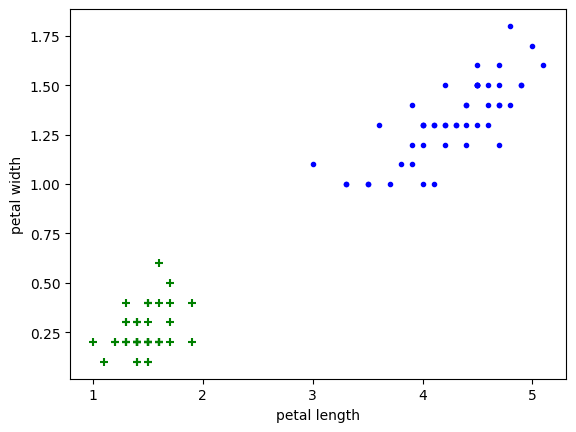

In [ ]:
plt.scatter(x=df0['petal length (cm)'],y=df0['petal width (cm)'],color='green',marker='+')
plt.scatter(x=df1['petal length (cm)'],y=df1['petal width (cm)'],color='blue',marker='.')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

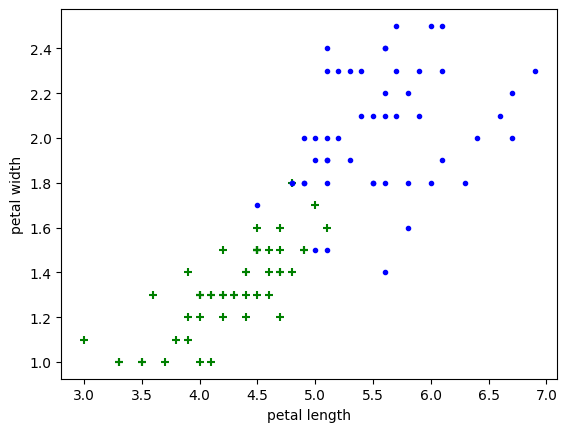

In [ ]:
plt.scatter(x=df1['petal length (cm)'],y=df1['petal width (cm)'],color='green',marker='+')
plt.scatter(x=df2['petal length (cm)'],y=df2['petal width (cm)'],color='blue',marker='.')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

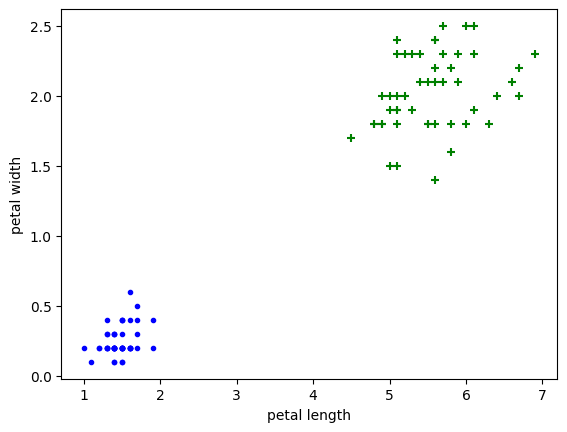

In [ ]:
plt.scatter(x=df2['petal length (cm)'],y=df2['petal width (cm)'],color='green',marker='+')
plt.scatter(x=df0['petal length (cm)'],y=df0['petal width (cm)'],color='blue',marker='.')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

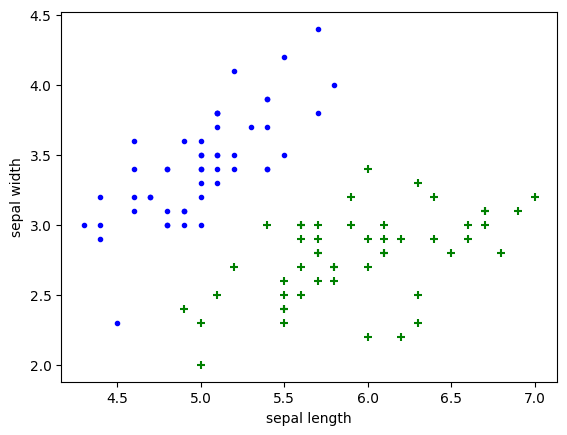

In [ ]:
plt.scatter(x=df1['sepal length (cm)'],y=df1['sepal width (cm)'],color='green',marker='+')
plt.scatter(x=df0['sepal length (cm)'],y=df0['sepal width (cm)'],color='blue',marker='.')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

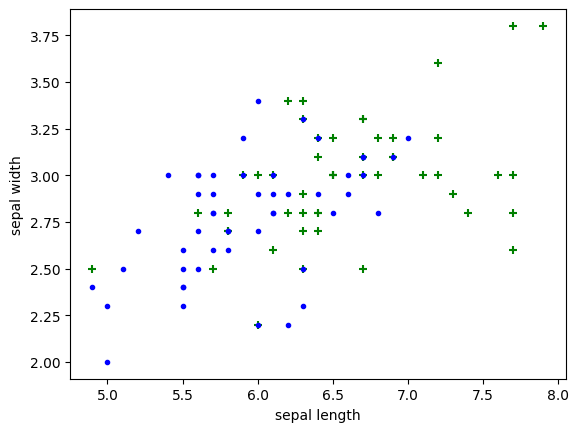

In [ ]:
plt.scatter(x=df2['sepal length (cm)'],y=df2['sepal width (cm)'],color='green',marker='+')
plt.scatter(x=df1['sepal length (cm)'],y=df1['sepal width (cm)'],color='blue',marker='.')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

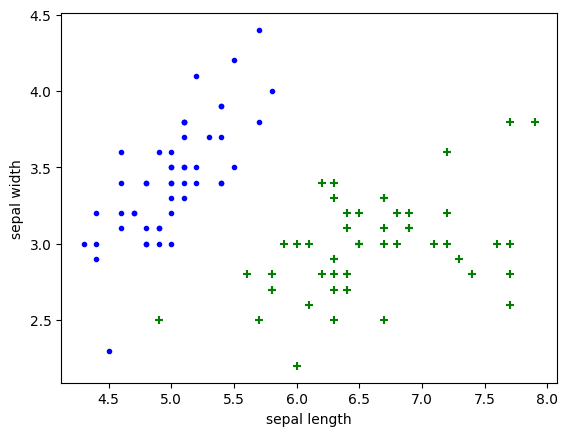

In [ ]:
plt.scatter(x=df2['sepal length (cm)'],y=df2['sepal width (cm)'],color='green',marker='+')
plt.scatter(x=df0['sepal length (cm)'],y=df0['sepal width (cm)'],color='blue',marker='.')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

### Data Preparation

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_class
22,4.6,3.6,1.0,0.2,0,setosa
15,5.7,4.4,1.5,0.4,0,setosa
65,6.7,3.1,4.4,1.4,1,versicolor
11,4.8,3.4,1.6,0.2,0,setosa
42,4.4,3.2,1.3,0.2,0,setosa


In [ ]:
X_train = df_train.drop(['target','target_class'], axis=1)
y_train = df_train['target']

In [ ]:
X_test = df_test.drop(['target','target_class'], axis=1)
y_test = df_test['target']

In [ ]:
len(X_train), len(X_test)

(120, 30)

### Model Building and Predictions

In [ ]:
model_svm = SVC(kernel='linear', random_state=0)
model_svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_test_pred = model_svm.predict(X_test)

In [ ]:
model_svm.score(X_test,y_test_pred)

1.0